Chapter 19

# 动量梯度下降数值优化
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码实现了**动量梯度下降法**优化二次函数，通过引入动量的概念加速收敛，并通过可视化展示了迭代路径和收敛行为。以下从数学角度详细描述代码的功能、数学公式以及可视化的意义。

---

### 1. **目标函数与梯度计算**

#### 目标函数
目标函数为一个简单的二次多项式：
$$
f(x) = 2x^2 - 8x + 1
$$
该函数的导数（梯度）为：
$$
f'(x) = \frac{d}{dx}(2x^2 - 8x + 1) = 4x - 8
$$
优化目标是找到使函数值最小的点 $x^*$，即使梯度为零的点：
$$
f'(x^*) = 0
$$

---

### 2. **动量梯度下降法**

#### 梯度下降的基本思想
普通梯度下降法的迭代更新公式为：
$$
x_{k+1} = x_k - \eta f'(x_k)
$$
其中：
- $x_k$ 是第 $k$ 次迭代时的点；
- $\eta$ 是学习率（步长）；
- $f'(x_k)$ 是目标函数在 $x_k$ 处的梯度。

#### 动量的引入
在动量梯度下降法中，通过引入动量项，加速收敛并减少震荡。更新公式为：
1. 动量更新：
   $$
   v_{k+1} = \gamma v_k + \eta f'(x_k)
   $$
   其中：
   - $v_k$ 是第 $k$ 次迭代的动量；
   - $\gamma$ 是动量因子，控制前一动量对当前更新的影响程度。

2. 位置更新：
   $$
   x_{k+1} = x_k - v_{k+1}
   $$

通过动量的累积，更新方向不再完全依赖于当前的梯度，而是包含了之前梯度的历史信息，从而提高优化过程的稳定性。

#### 收敛条件
动量梯度下降的终止条件为：
1. 当前迭代点的变化小于容差 $tol$：
   $$
   |x_{k+1} - x_k| < tol
   $$
2. 达到最大迭代次数。

---

### 3. **实现过程**

#### 动量梯度下降函数
`momentum_gradient_descent` 函数实现了上述动量梯度下降算法，依次记录每次迭代的变量值 $x_k$，并返回完整的优化路径。

#### 参数说明
- 初始点 $x_0 = 5$；
- 学习率 $\eta = 0.1$；
- 动量因子 $\gamma = 0.2$。

通过这些参数控制收敛速度和路径的平滑性。

---

### 4. **可视化动量梯度下降过程**

#### 可视化内容
函数 `visualize_momentum_gradient_descent` 绘制了三个子图：
1. **目标函数及迭代轨迹**：
   - 蓝色曲线表示目标函数 $f(x)$；
   - 黑色叉点表示每次迭代的点 $(x_k, f(x_k))$；
   - 红色连线显示了迭代路径，直观展示了点如何沿着函数曲面移动到最优解。

2. **变量 $x_k$ 的变化**：
   - 横轴为迭代次数，纵轴为 $x_k$ 的值；
   - 曲线反映了动量梯度下降法中 $x_k$ 收敛到最优解 $x^*$ 的过程。

3. **函数值 $f(x_k)$ 的变化**：
   - 横轴为迭代次数，纵轴为 $f(x_k)$ 的值；
   - 曲线展示了函数值逐步逼近最小值的过程。

#### 动量效果
从可视化中可以观察到动量的作用：
- 动量的累积加速了收敛；
- 更新路径更加平滑，减少了普通梯度下降中可能出现的震荡。

---

### 5. **测试与结果**

#### 理论解
对于函数 $f(x)$，解析解为：
$$
x^* = \frac{-b}{2a} = \frac{8}{4} = 2
$$
对应的最小值为：
$$
f(x^*) = 2(2)^2 - 8(2) + 1 = -7
$$

#### 实际结果
代码运行后得到：
- 动量梯度下降找到的最优点 $x^* \approx 2$；
- 对应的最小值 $f(x^*) \approx -7$。

结果与理论值一致，验证了算法的正确性。

---

### 6. **总结与应用**

#### 动量梯度下降的优点
动量梯度下降法通过引入动量项解决了普通梯度下降中的两个主要问题：
1. 在陡峭区域的收敛速度更快；
2. 在平坦区域或多维问题中减少了梯度震荡。

#### 应用场景
动量梯度下降法广泛应用于：
- 神经网络优化（如 SGD + Momentum）；
- 大规模数据集的模型参数调整；
- 其他非凸优化问题。

#### 可视化的意义
通过可视化梯度下降过程，可以直观理解动量如何影响优化路径，从而更好地选择超参数（如学习率 $\eta$ 和动量因子 $\gamma$），是学习优化算法的重要工具。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度

## 目标函数

In [3]:
x = symbols('x')
func = 2*x**2 - 8*x + 1
func

2*x**2 - 8*x + 1

In [4]:
grad = diff(func, x)  # 计算函数的导数
grad

4*x - 8

In [5]:
# 将函数和梯度转换为 Python 可执行函数
f = lambdify(x, func, 'numpy')
grad_f = lambdify(x, grad, 'numpy')

## 动量梯度下降实现

In [6]:
def momentum_gradient_descent(f, grad_f, x0, learning_rate=0.1, gamma=0.9, max_iter=50, tol=1e-6):
    x_vals = [x0]
    v = 0  # 初始动量为 0
    for _ in range(max_iter):
        grad_val = grad_f(x_vals[-1])  # 当前点的梯度
        v = gamma * v + learning_rate * grad_val  # 更新动量
        x_new = x_vals[-1] - v  # 按动量更新位置
        x_vals.append(x_new)
        if abs(x_new - x_vals[-2]) < tol:  # 如果变化小于容差，停止迭代
            break
    return x_vals

## 可视化梯度下降过程和收敛

In [7]:
def visualize_momentum_gradient_descent(f, x_vals):
    x = np.linspace(-1, 5, 500)  # 设置绘图范围
    y = f(x)

    # 获取收敛的函数值和对应的最小值点
    f_vals = [f(val) for val in x_vals]
    iterations = np.arange(len(x_vals))

    # 创建图像，分三行一列
    fig, axs = plt.subplots(3, 1, figsize=(8, 6), 
                            height_ratios=[2, 1, 1],
                            constrained_layout=True)

    # 图1：目标函数及梯度下降过程
    axs[0].plot(x, y, label="f(x)", color="blue")
    axs[0].scatter(x_vals, f_vals, color="k", marker = 'x', label="Iterations")
    axs[0].plot(x_vals, f_vals, linestyle="-", color="red", alpha=0.6)
    axs[0].set_title("Gradient Descent Optimization")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("f(x)")
    axs[0].set_xlim(-1,5)
    axs[0].legend()
    axs[0].grid(True)

    # 图2：收敛过程中最小值点的变化
    axs[1].plot(iterations, x_vals, marker="x", label="x value", color="green")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel("Optimized x")
    axs[1].set_xlim(iterations.min(),iterations.max())
    axs[1].set_xticks(np.arange(0, iterations.max(), 2))
    axs[1].legend()
    axs[1].grid(True)

    # 图3：收敛过程中最小值点的变化
    axs[2].plot(iterations, f_vals, marker="x", label="f(x)", color="blue")
    axs[2].set_xlabel("Iteration")
    axs[2].set_ylabel("Optimized min of f(x)")
    axs[2].set_xlim(iterations.min(),iterations.max())
    axs[2].set_xticks(np.arange(0, iterations.max(), 2))
    axs[2].legend()
    axs[2].grid(True)

## 测试动量梯度下降

In [8]:
x0 = 5  # 初始点
learning_rate = 0.1
gamma = 0.2
x_vals = momentum_gradient_descent(f, grad_f, x0, learning_rate, gamma)

In [9]:
print(f"动量梯度下降找到的最小值点: {x_vals[-1]}")
print(f"最小值: {f(x_vals[-1])}")

动量梯度下降找到的最小值点: 1.9999998357195456
最小值: -6.999999999999946


## 可视化

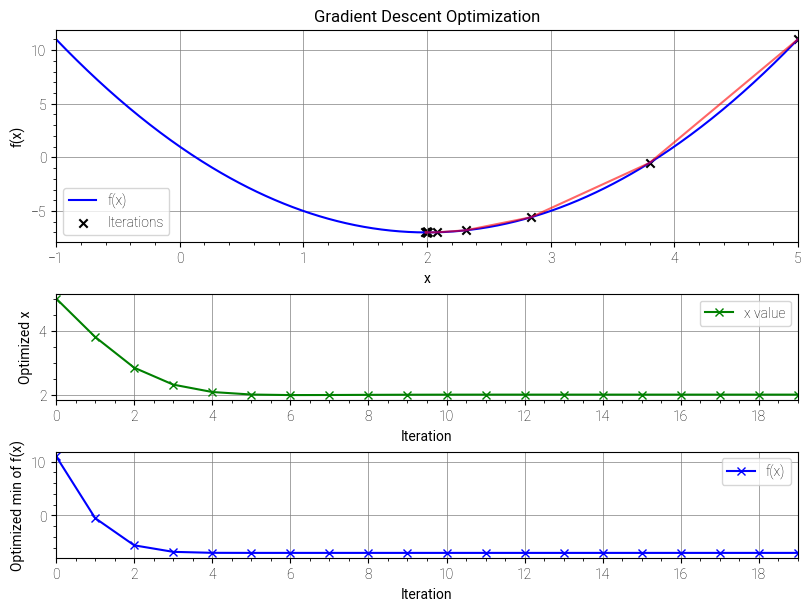

In [10]:
visualize_momentum_gradient_descent(f, x_vals)